In this example we will illustrate that the effect of the parameters ``gamma`` and ``C`` of the Radial Basis Function (RBF) kernel SVM.<br><br>
Intuitively, the ``γ`` parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. <br>
The ``C`` parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of ``C``, a smaller margin will be accepted if the decision function is better at classifying all training points correctly.<br><br>
A lower ``C`` will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. We always want to have a larger margin to capture as much values as we can. Fatness of the separation is being controled with``C`` parameter. Thus``C`` behaves as a regularization parameter in the SVM.

In practice, the reason that SVMs tend to be resistant to over-fitting, even in cases where the number of attributes is greater than the number of observations, is that it uses regularization. They key to avoiding over-fitting lies in careful tuning of the regularization parameter, ``C``, and in the case of non-linear SVMs, careful choice of kernel and tuning of the kernel parameters.

The SVM is an approximate implementation of a bound on the generalization error, that depends on the margin (essentially the distance from the decision boundary to the nearest pattern from each class), but is independent of the dimensionality of the feature space (which is why using the kernel trick to map the data into a very high dimensional space isn't such a bad idea as it might seem). So in principle SVMs should be highly resistant to over-fitting, but in practice this depends on the careful choice of ``C`` and the kernel parameters

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import svm
from sklearn.model_selection import cross_val_score
import sys
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from matplotlib.colors import Normalize
from sklearn.datasets import load_svmlight_file  

def get_data(filename):
    data = load_svmlight_file(filename)
    return data[0], data[1]

In [24]:
# Read data, 
X,Y = get_data("breast-cancer_scale.txt")

# Create range for C and gamma
C_range = 10. ** np.arange(-4, 9)
gamma_range = 10. ** np.arange(-7, 4)

# Specify kernel, gamma and C parameters of SVC class
for gamma_idx, gamma in enumerate(gamma_range):   
    for C_idx, C in enumerate(C_range):          
        clf = svm.SVC( kernel="rbf", gamma=gamma, C=C)
            
        # Print Process Information -- SİLİNECEK
        n_clf = gamma_idx*len(C_range) + C_idx
        total_clf = len(gamma_range)*len(C_range)
        sys.stdout.write(f"* Fit {n_clf+1:3d}/{total_clf:3d} SVM classifiers...\r")
        sys.stdout.flush()
print("----------------------------------------->")

# Apply cross-validation
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Find the best parameters and fit
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, Y)

# Calculate the scores
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

----------------------------------------->


In [27]:
#Print results
print("The best parameters are: %s"
      % (grid.best_params_))
print("The best score %0.2f"
      % (grid.best_score_))
print("Total classification error %0.2f"
      % (1-grid.best_score_))

The best parameters are: {'C': 1.0, 'gamma': 0.1}
The best score 0.97
Total classification error 0.03


In [31]:
# Normalize class from sklearn
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# Plot Heatmap in order to understand which combinations of parameters are best suited to my model 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
          norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.title('Cross Validation Accuracy')
plt.xlabel('Kernel Parameter (γ)', {'size': 16})
plt.ylabel('Box Constraint (C)', {'size': 16})
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.colorbar()
plt.savefig('HeatMap' +'.png')
#plt.show()
plt.close()

Heat map shows changes in accuracy by the effects of ``γ`` and ``C``

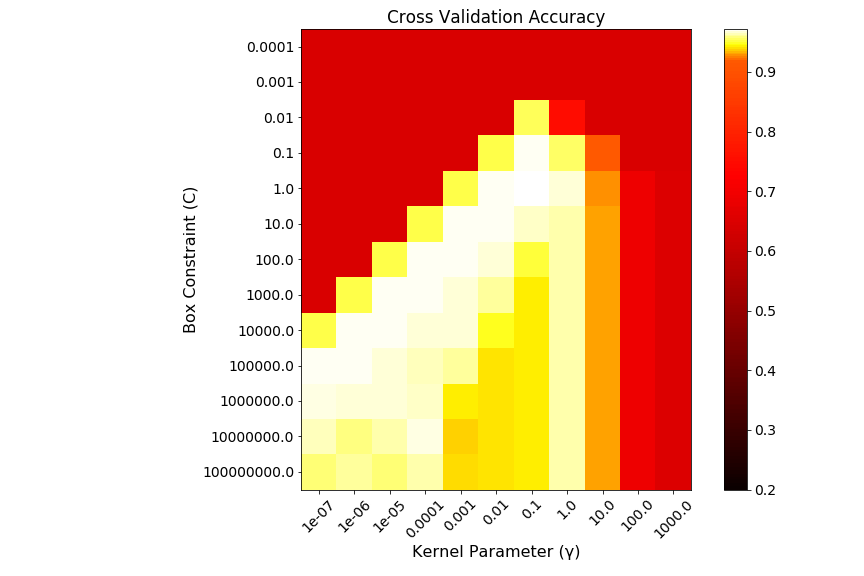

While ``γ`` is fixed and ``C`` increases, accuracy gets better. Similarly, for stable ``C``, error increases by ``γ`` increases. There is a lineer correlation between ``C`` and ``γ``.

Generalisation error in statistics is generally the out-of-sample error which is the measure of how accurately a model can predict values for previously unseen data. Result the report from the analysis.

The best parameters are: {'C': 1.0, 'gamma': 0.1}<br>
The best score 0.97<br>
Total classification error 0.03<br>